In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import os

In [2]:
def read_file(data_dir):
    ani_dir = data_dir + '/animal/'
    fru_dir = data_dir + '/fruit/'
    ani_names = tf.constant([ani_dir + fn for fn in os.listdir(ani_dir)])
    fru_names = tf.constant([fru_dir + fn for fn in os.listdir(fru_dir)])
    filenames = tf.concat([ani_names , fru_names] , axis = -1)
    
    labels = tf.concat([tf.zeros(ani_names.shape , dtype = tf.int32),
                        tf.ones(fru_names.shape , dtype = tf.int32)],
                       axis = -1)
    return filenames , labels

In [3]:
def resize_img(filename , label):
    img_str = tf.io.read_file(filename)
    img_decode = tf.image.decode_jpeg(img_str , channels = 3)
    img_resize = tf.image.resize(img_decode , [32 , 32])  / 255.0
    return img_resize , label

In [4]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


In [5]:
def pre_data(data_dir):
    filenames , labels = read_file(train_data_dir)
    dataset = tf.data.Dataset.from_tensor_slices((filenames , labels))
    dataset = dataset.map(
                       map_func = resize_img ,
                       num_parallel_calls = tf.data.experimental.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

In [6]:
train_data_dir = 'D:/project/tr01'

In [7]:
buffer_size = 1500
batch_size = 64

In [8]:

train_data = pre_data(train_data_dir)
it = iter(train_data)
images , labels = next(it)
print(images.shape)
print(labels.shape)
print(train_data)
images
labels

(64, 32, 32, 3)
(64,)
<PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int32)>


<tf.Tensor: shape=(64,), dtype=int32, numpy=
array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1])>

In [9]:
#建立空框架
model = tf.keras.models.Sequential()

#图像添加噪声
tf.keras.layers.GaussianNoise(1)
#第一卷积层
model.add(tf.keras.layers.Conv2D(filters = 8 ,
                                 kernel_size = (3 , 3) ,
                                 input_shape = (32 , 32 , 3) ,
                                 activation = 'relu'
                                 ))

#防止过拟合，抛弃掉一些特征数据
model.add(tf.keras.layers.Dropout(rate = 0.3))

#第一个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2 , 2)))

#防止过拟合
model.add(tf.keras.layers.Dropout(rate = 0.3))

#图像添加噪声
tf.keras.layers.GaussianNoise(1)

#第二个卷积层
model.add(tf.keras.layers.Conv2D(filters =16 ,
                                 kernel_size  = (3 , 3) ,
                                 activation = 'relu' 
                                 ))

#防止过拟合
model.add(tf.keras.layers.Dropout(rate = 0.5))

#第二个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2 , 2)))

#图像添加噪声
tf.keras.layers.GaussianNoise(1)

#平坦层
model.add(tf.keras.layers.Flatten())

#全连接层
model.add(tf.keras.layers.Dense(32 , activation = 'relu'))

#输出层
model.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))


# In[14]:


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0

In [10]:
train_epochs = 500

model.compile(optimizer = 'adam' ,
              loss = 'binary_crossentropy' ,
              metrics = ['accuracy'])

In [11]:
train_history = model.fit(images , labels ,
                          validation_split = 0.5 ,
                          epochs = train_epochs ,
                          batch_size = batch_size ,
                          verbose = 2)


Train on 32 samples, validate on 32 samples
Epoch 1/500
32/32 - 2s - loss: 0.8183 - accuracy: 0.4688 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 2/500
32/32 - 0s - loss: 0.7398 - accuracy: 0.5312 - val_loss: 0.6778 - val_accuracy: 0.5312
Epoch 3/500
32/32 - 0s - loss: 0.6322 - accuracy: 0.6250 - val_loss: 0.6664 - val_accuracy: 0.5938
Epoch 4/500
32/32 - 0s - loss: 0.6731 - accuracy: 0.5000 - val_loss: 0.6557 - val_accuracy: 0.5938
Epoch 5/500
32/32 - 0s - loss: 0.6120 - accuracy: 0.6250 - val_loss: 0.6443 - val_accuracy: 0.5938
Epoch 6/500
32/32 - 0s - loss: 0.5650 - accuracy: 0.7188 - val_loss: 0.6315 - val_accuracy: 0.6562
Epoch 7/500
32/32 - 0s - loss: 0.5840 - accuracy: 0.6875 - val_loss: 0.6198 - val_accuracy: 0.8125
Epoch 8/500
32/32 - 0s - loss: 0.5718 - accuracy: 0.6562 - val_loss: 0.6094 - val_accuracy: 0.8125
Epoch 9/500
32/32 - 0s - loss: 0.5504 - accuracy: 0.7188 - val_loss: 0.5973 - val_accuracy: 0.8125
Epoch 10/500
32/32 - 0s - loss: 0.5211 - accuracy: 0.8125 - val_l

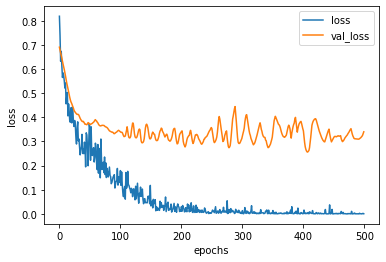

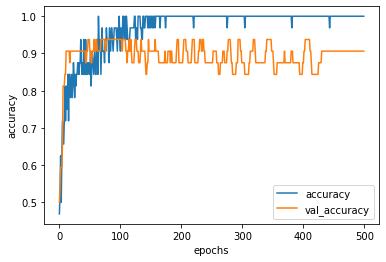

In [12]:

plot_graphs(train_history, 'loss')
plot_graphs(train_history, 'accuracy')

In [14]:
test_loss , test_acc = model.evaluate(train_data , verbose = 2)

9/9 - 1s - loss: 0.3596 - accuracy: 0.8667


In [15]:
tf.keras.models.save_model(
    model, "D:\project", overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: D:\project\assets
